In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
from sklearn.linear_model import LogisticRegression

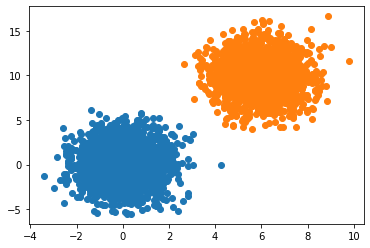

In [2]:
sample = 2000

mean = [0, 0]
cov = [[1, 0], [0, 4]] # diagonal covariance
x, y = np.random.multivariate_normal(mean , cov , sample).T

X = np.array ([x,y])

mean = [6, 10]
x, y = np.random.multivariate_normal(mean , cov , sample).T

X = np.concatenate((X, np.array([x,y])),axis = 1)
plt.scatter(X[0,:sample], X[1,:sample])
plt.scatter(X[0,sample:], X[1,sample:])
plt.show()

In [3]:
y = np.concatenate((np.zeros(sample), np.ones(sample)))
np.shape(y)

(4000,)

In [4]:
clf = LogisticRegression(random_state=0).fit(X.T, y)
np.shape(X.T)

(4000, 2)

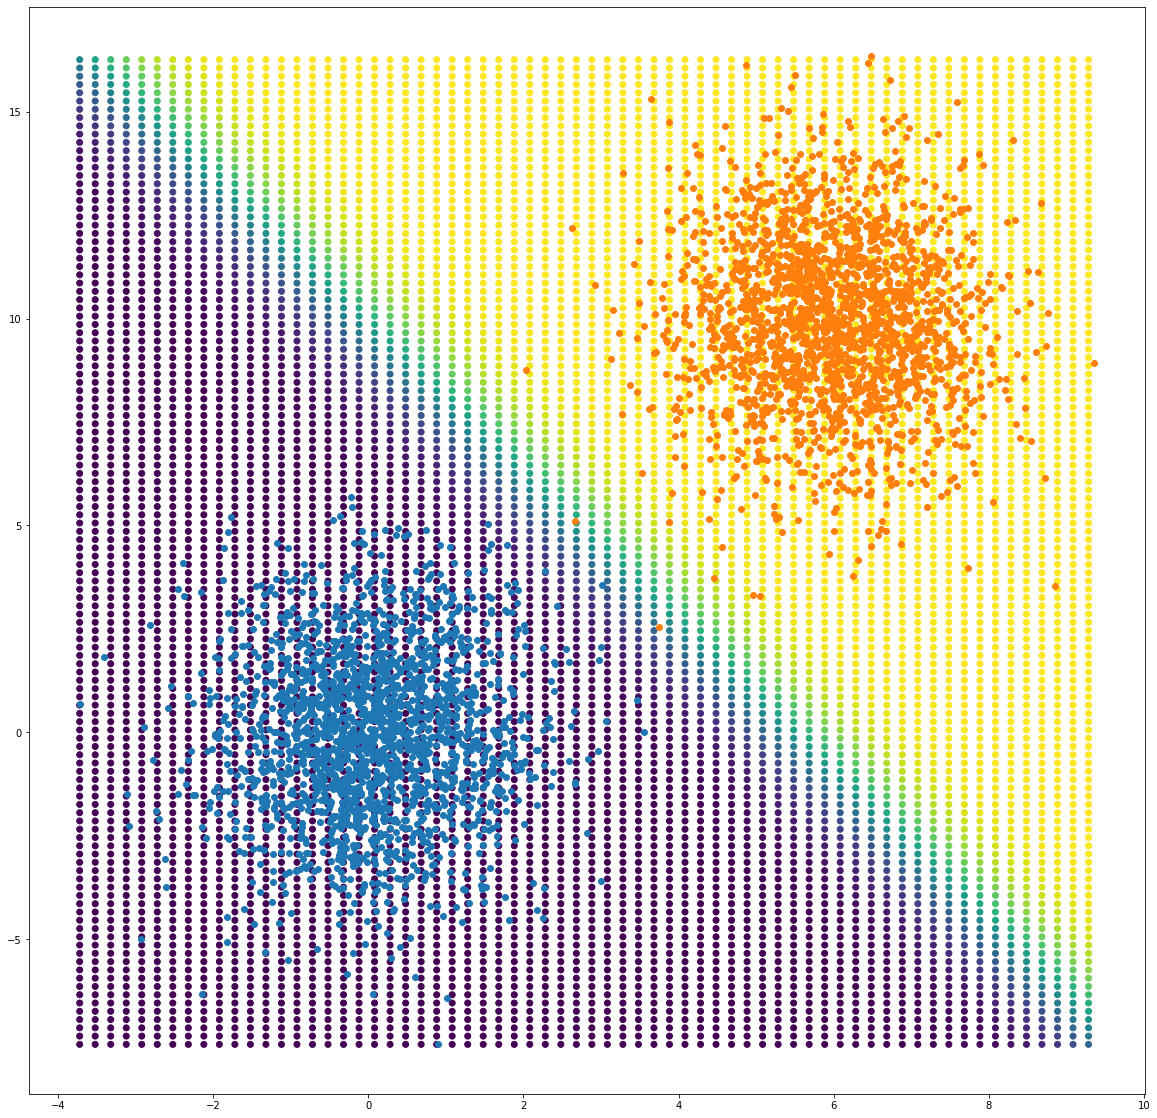

In [5]:
#plot 3D
data = []
x = np.arange(min(X[0,:]),max(X[0,:]),0.2)
y = np.arange(min(X[1,:]),max(X[1,:]),0.2)
xx, yy = np.meshgrid(x,y)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

zdata = clf.predict_proba(grid)

fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(111)


# Data for three-dimensional scattered points

#ax.plot_surface(X,Y)
ax.scatter(grid[:,0], grid[:,1], c=zdata[:,1], cmap='viridis')

ax.scatter(X[0,:sample], X[1,:sample])
ax.scatter(X[0,sample:], X[1,sample:])
plt.savefig('logistic_regresion_3D_2')
plt.show()